In [356]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string

In [357]:
df_train = pd.read_csv('train.csv', encoding='latin1')
df_test = pd.read_csv('test.csv', encoding='latin1')

In [358]:
df_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [359]:
df_train = df_train[["text","sentiment"]]
df_test = df_test[["text","sentiment"]]

In [360]:
df_test.shape

(4815, 2)

In [361]:
df_train.shape

(27481, 2)

In [362]:
df_train.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [363]:
df_train.isna().sum()

text         1
sentiment    0
dtype: int64

In [364]:
df_train.dropna(inplace=True)

In [365]:
df_test.isna().sum()

text         1281
sentiment    1281
dtype: int64

In [366]:
df_test.dropna(inplace=True)

In [367]:
def delete_url(s):
    return re.sub(r'http\S+|www.\S+','', s)

def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree
    
stem = PorterStemmer()

def stemming(content):
    stemmed_content = content.split()
    stemmed_content = [stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    return " ".join(stemmed_content)

In [368]:
df_train['text'] = df_train['text'].apply(delete_url)
df_test['text'] = df_test['text'].apply(delete_url)

In [369]:
df_train['text']= df_train['text'].apply(lambda x:remove_punctuation(x))
df_test['text']= df_test['text'].apply(lambda x:remove_punctuation(x))

In [370]:
df_train['text'] = df_train['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

In [371]:
# df_train['text'] = df_train['text'].apply(stemming)
# df_test['text'] = df_test['text'].apply(stemming)

In [372]:
not_word_train = df_train["text"].str.len() < 2
not_word_test = df_test["text"].str.len() < 2
df_train = df_train[~not_word_train]
df_test = df_test[~not_word_test]

In [373]:
count_vectorizer = CountVectorizer(stop_words="english") # max_features = 1400

In [374]:
X_train = df_train['text']
y_train = df_train['sentiment']

X_test = df_test['text']
y_test = df_test['sentiment']

In [375]:
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [376]:
model = MultinomialNB()
model.fit(count_train,y_train)

In [379]:
pred = model.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
score

0.6505376344086021

In [380]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)

In [381]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [382]:
model = MultinomialNB()
model.fit(tfidf_train,y_train)

MultinomialNB()

In [383]:
pred = model.predict(tfidf_test)
score = metrics.accuracy_score(y_test,pred)
score

0.6256366723259762

In [384]:
alphas = np.arange(0,10,1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train,y_train)
    pred = nb_classifier.predict(count_test)
    score = metrics.accuracy_score(y_test,pred)
    return score

alpha_val = []
score = []

for alpha in alphas:
    print('Alpha: ', alpha)
    alpha_val.append(alpha)
    print('Score: ', train_and_predict(alpha))
    score.append(train_and_predict(alpha))
    print()

Alpha:  0
Score:  0.5809281267685342

Alpha:  1
Score:  0.6505376344086021

Alpha:  2
Score:  0.6621392190152802


/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/softylines/Library/Python/3.9/lib/python/site-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(



Alpha:  3
Score:  0.6669496321448783

Alpha:  4
Score:  0.6629881154499151

Alpha:  5
Score:  0.6641199773627617

Alpha:  6
Score:  0.6612903225806451

Alpha:  7
Score:  0.6598754951895869

Alpha:  8
Score:  0.6590265987549518

Alpha:  9
Score:  0.6593095642331636



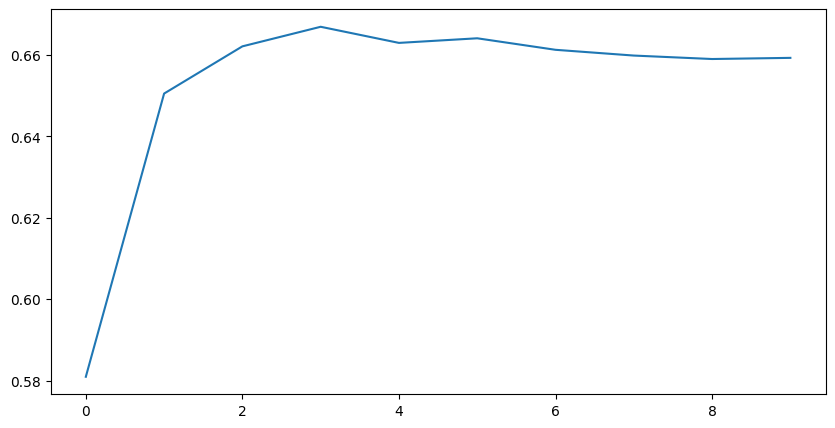

In [385]:
plt.figure(figsize=(10,5))
plt.plot(alpha_val,score)
plt.show()

In [390]:
best_model = MultinomialNB(alpha=3)
best_model.fit(count_train,y_train)
pred = best_model.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
score

0.6669496321448783

In [391]:
new_text = ["i am sad","i am happy"]
new_features = tfidf_vectorizer.transform(new_text)
prediction = best_model.predict(new_features)

print(prediction)

['negative' 'positive']


In [388]:
from sklearn.ensemble import RandomForestClassifier

RFC_model = RandomForestClassifier()

RFC_model.fit(count_train, y_train)

y_pred = RFC_model.predict(count_test)

metrics.accuracy_score(y_test, y_pred)

0.6943972835314092

In [389]:
new_text = ["i am happy","i am sad","this is a bad day"]
new_features = tfidf_vectorizer.transform(new_text)
prediction = RFC_model.predict(new_features)

print(prediction)

['positive' 'negative' 'negative']
